## Librerias

In [91]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pathlib import Path #Solucion para encontrar la ruta del archivo sin importar el sistema operativo

# Configurar pandas para mostrar 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)


BASE_DIR = Path().resolve()

while not (BASE_DIR / "Datos").exists():
    BASE_DIR = BASE_DIR.parent


## Carpeta de imagenes

In [92]:
IMAGES_PATH = "Galeria"  # Nombre de la carpeta
os.makedirs(IMAGES_PATH, exist_ok=True) # Crea la carpeta si no existe

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Imagen guardada como ", fig_id, "en la carpeta", IMAGES_PATH) #Mensaje mas informativo
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Cargar datos


In [93]:
stores = pd.read_csv(BASE_DIR / "Datos" / "stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [94]:
features = pd.read_csv(BASE_DIR / "Datos" / "features.csv"/"features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,False


In [95]:
sample_submission = pd.read_csv(BASE_DIR / "Datos" / "sampleSubmission.csv"/"sampleSubmission.csv")
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [96]:
test = pd.read_csv(BASE_DIR / "Datos" / "test.csv"/ "test.csv")
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [97]:
train = pd.read_csv(BASE_DIR / "Datos" / "train.csv"/ "train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Análisis exploratorio de los datos

### Tiendas 

In [98]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [99]:
print("El número de filas y columnas en el dataset de 'Stores'es:", stores.shape)

El número de filas y columnas en el dataset de 'Stores'es: (45, 3)


#### Type of stores

In [100]:
print("Los tipos de tiendas en el dataset de 'Stores'son:"
      "\n           ", stores["Type"].unique())



print("Número de tiendas del tipo A:", len(stores[stores["Type"] == "A"]))
print("Número de tiendas del tipo B:", len(stores[stores["Type"] == "B"]))
print("Número de tiendas del tipo C:", len(stores[stores["Type"] == "C"]))


Los tipos de tiendas en el dataset de 'Stores'son:
            ['A' 'B' 'C']
Número de tiendas del tipo A: 22
Número de tiendas del tipo B: 17
Número de tiendas del tipo C: 6


##### Tiendas tipo A

In [101]:
Tiendas_A = stores[stores["Type"] == "A"]
print("Número de tiendas del tipo A:", len(Tiendas_A))

Número de tiendas del tipo A: 22


In [102]:
# Promedio de Tamaño de la tienda del tipo A
Promedio_Tamaño_A = Tiendas_A["Size"].mean()
print(f'El promedio del tamaño de las tiendas del tipo A es: {Promedio_Tamaño_A:.2f}')

El promedio del tamaño de las tiendas del tipo A es: 177247.73


##### Tiendas tipo B

In [103]:
Tiendas_B = stores[stores['Type']=='B']
print ("Número de tiendas del tipo B:", len(Tiendas_B))

Número de tiendas del tipo B: 17


In [104]:
# Promedio de Tamaño de la tienda del tipo B
Promedio_Tamaño_B = Tiendas_B["Size"].mean()
print(f'El promedio del tamaño de las tiendas del tipo B es: {Promedio_Tamaño_B:.2f}')

El promedio del tamaño de las tiendas del tipo B es: 101190.71


##### Tiendas tipo C

In [105]:
Tiendas_C = stores[stores['Type']=='C']
print ("Número de tiendas del tipo C:", len(Tiendas_C))

Número de tiendas del tipo C: 6


In [106]:
# Promedio de ventas por tienda del tipo C
Promedio_Tamaño_C = Tiendas_C["Size"].mean()
print(f'El promedio del tamaño de las tiendas del tipo C es: {Promedio_Tamaño_C:.2f}')

El promedio del tamaño de las tiendas del tipo C es: 40541.67


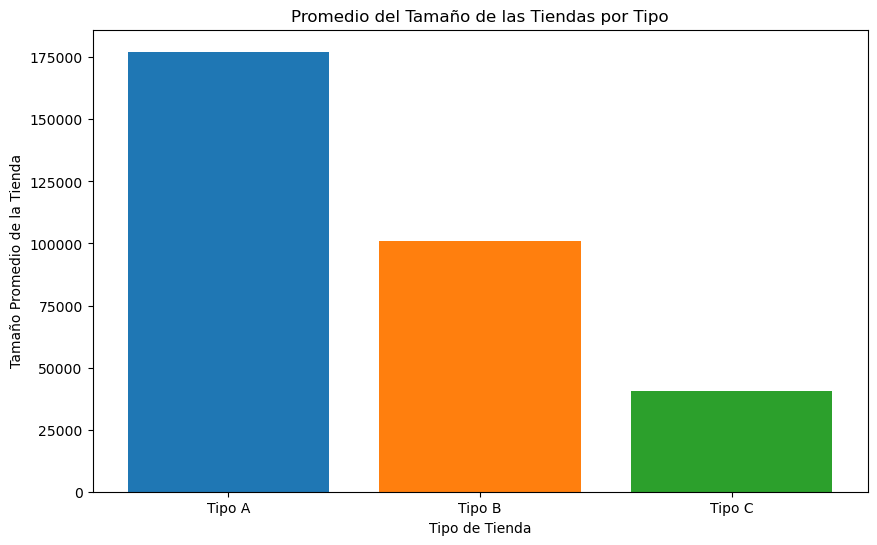

Imagen guardada como  Promedio_Tamaño_Tiendas en la carpeta Galeria


<Figure size 640x480 with 0 Axes>

In [107]:
# Graficar el tamaño de las tiendas por tipo
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, naranja y verde
plt.figure(figsize=(10, 6))
plt.bar(['Tipo A', 'Tipo B', 'Tipo C'], [Promedio_Tamaño_A, Promedio_Tamaño_B, Promedio_Tamaño_C], color=colores)
plt.title('Promedio del Tamaño de las Tiendas por Tipo')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Tamaño Promedio de la Tienda')
plt.show()

# Guardar la figura
save_fig("Promedio_Tamaño_Tiendas")

